<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/SQL/Database_Oracle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.oracle.com/database/technologies/xe-prior-releases.html  
Oracle Database 11gR2 Express Edition for Windows x64  
stup.exe 관리자권한으로 실행  
비번 admin1234

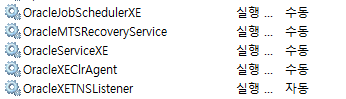

- 1521 : client가 접근할 수 있도록 제공해주는 객체, listener가 죽어있으면 client가 접근이 불가, c드라이브 - product - server - network - ADMNIN - listener.ora와 tnsnames.ora 파일을 열어봐서 HOST이름이 한글이면 IP주소로 바꿔주기
- 8080 : 서버의 포트, Tomcat(c드라이브 - apache-tomcat-9.0.45 - conf - server.xml - 아래부분만 8787로 변경)보다 우선순위  
        <Connector port="8787" protocol="HTTP/1.1"
               connectionTimeout="20000"
               redirectPort="8443" />
- XE : SID(Service ID)

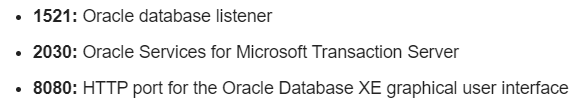

## 3-tier(WAS, web_application, DB Server) 구조
- Client : end 유저
- WAS logs: client 정보와 web_application 정보
- DB Server logs: XE 서비스에 접근한 정보


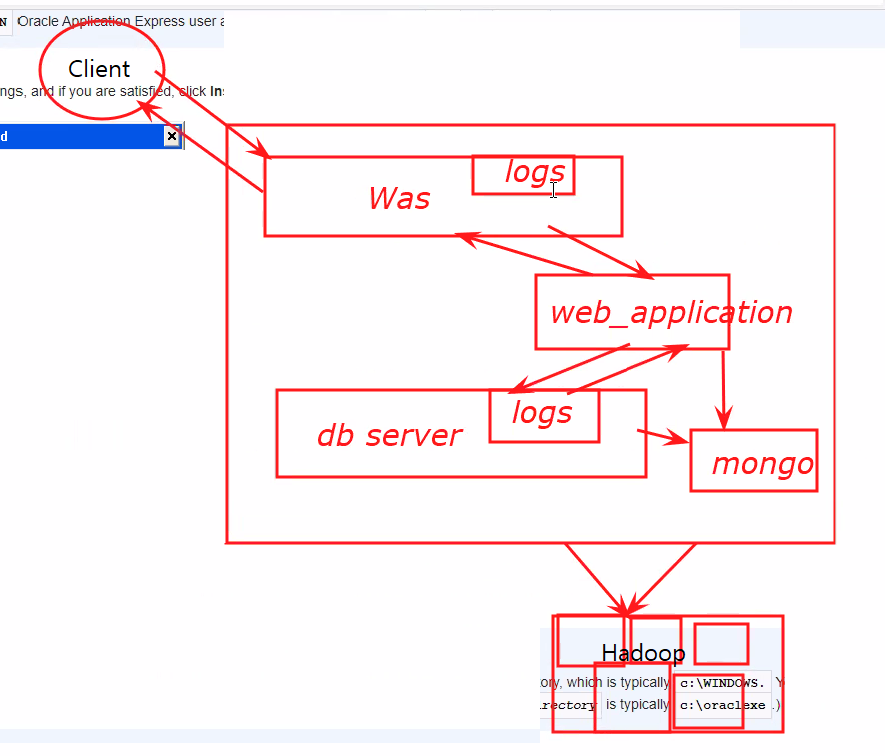

## 로그파일 경로
aa.png

## DB드라이버
- 예를들어, java와 DB를 연결할 때 jdbc 드라이버가 필요

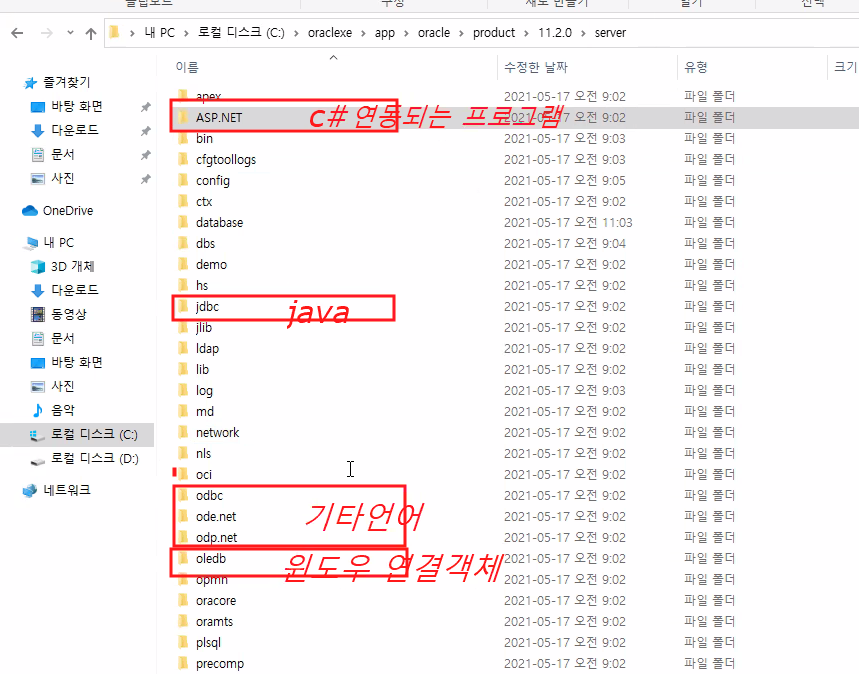

### java와 DB를 연결
C:\oraclexe\app\oracle\product\11.2.0\server\jdbc\lib 여기에 있는 파일 3개를
C:\Program Files\Java\jdk1.8.0_291\jre\lib\ext 와 C:\Program Files\Java\jre1.8.0_291\lib\ext 여기 2곳에 복붙

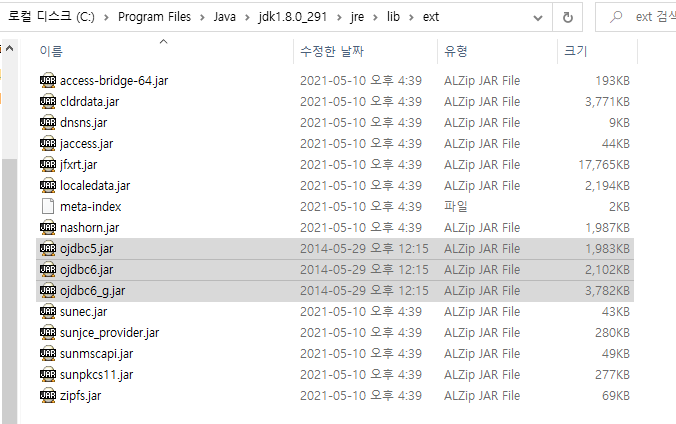

https://docs.oracle.com/cd/E17781_01/admin.112/e18585/toc.htm#XEGSG110  

cmd  
sqlplus  
system  
암호입력: admin1234  
show user  
create user test_user identified by admin1234;  
grant CREATE SESSION, ALTER SESSION, CREATE DATABASE LINK, -
  CREATE MATERIALIZED VIEW, CREATE PROCEDURE, CREATE PUBLIC SYNONYM, -
  CREATE ROLE, CREATE SEQUENCE, CREATE SYNONYM, CREATE TABLE, - 
  CREATE TRIGGER, CREATE TYPE, CREATE VIEW, UNLIMITED TABLESPACE -
  to test_user;  
host 나갔다가  
exit 다시 들어옴  
connect  
test_user  
암호입력: admin1234  
show user  
exit 완전히 나감  
sqlplus test_user/admin1234 한번에 들어옴  
  
@"c:\Test\scott.sql"  
connect  
SCOTT
암호입력: TIGER  
show user  



주석처리 : --

In [ ]:
SELECT 컬럼 or *
FROM 테이블;

In [ ]:
SELECT *
FROM TAB;

In [ ]:
DESC EMP; # 구조 
# 사원테이블(EMP) = 엔티티
# 컬럼 = 속성 = Attribute

In [ ]:
# 사원 테이블의 모든 컬럼 확인
SELECT *
FROM EMP;

In [ ]:
SET PAGES 100
SET NUM 5
COLUMN ENAME FORMAT A10 # 컬럼 너비 조정 # 알파벳 10글자까지만
COLUMN SAL FORMAT 99999

- NUMBER(2) : 정수형 2자리  
- NUMBER(4) : 정수형 4자리  
- NUMBER(7,2) : 실수형 7자리, 소수이하 2자리  
- CHAR(20) : 정적 문자열, 무조건 20자리를 다 메모리에 올림
- VARCHAR2(20) : 가변 문자열, 영문자4천자 한글2천자 중 20개만  
- DATE: 날짜  

- 강한 주종(참조)관계: DEPT(주) - EMP(종)
- 약한 주종관계: 주테이블 중 일부와 참조관계

In [ ]:
SELECT *
FROM EMP, DEPT;

SELECT 컬럼 (AS) 별칭  
FROM 테이블 별칭

In [ ]:
SELECT 사원.ENAME, 부서.DEPTNO, 부서.DNAME
FROM EMP 사원, DEPT 부서;

In [ ]:
SELECT ENAME "사원의 이름", DEPTNO 부서번호, SAL 봉급
FROM EMP;

SELECT ENAME AS "사원의 이름", DEPTNO AS "부서번호", SAL AS 봉급
FROM EMP;

In [ ]:
# 더블쿼터 아니고 싱글이로!
SELECT ENAME||'님'
FROM EMP;

SELECT ENAME||'님은 '||HIREDATE||'일에 입사했다'
FROM EMP;

In [ ]:
# DISTINCT : 해당 컬럼에서 중복제거, 반대는 ALL
SELECT DISTINCT JOB, DEPTNO
FROM EMP;

In [ ]:
SELECT ENAME, SAL*12+COMM
FROM EMP;

In [ ]:
# NULL : 0 또는 공백과 다름, 연산되지 않음, NULL이 하나라도 섞여있으면 결과도 NULL
SELECT COMM, NVL(COMM, 0)
FROM EMP;

SELECT ENAME, SAL*12+NVL(COMM, 0) 연봉
FROM EMP;

In [ ]:
# ASC(오름차순)가 기본
SELECT ENAME
FROM EMP
ORDER BY ENAME ASC; 

SELECT ENAME, SAL
FROM EMP
ORDER BY 2 DESC;

In [ ]:
SELECT ROWID, ENAME
FROM EMP;

In [ ]:
SELECT 100+200
FROM DUAL;

SELECT 2 * 1.23, '3 * 2,34' 
FROM DUAL;

SELECT SYSDATE # 시스템 오늘 날짜 리턴
FROM DUAL;

SELECT SYSDATE, SYSDATE+1 AS 내일
FROM DUAL;

In [ ]:
SELECT ENAME, 'ABC', SAL, 500 
FROM EMP;

In [ ]:
SELECT HIREDATE, HIREDATE+20
FROM EMP;

## Pseudo Column(의사 열)
- 쿼리가 가능한 열
- 수정이나 삭제 안 됨
- order by에 의한 정렬 이전에 부여됨
- rownum : 행의 일련번호
- rowid : 행 id

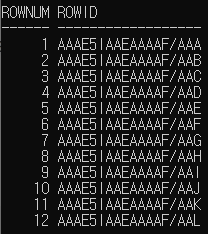

In [ ]:
SELECT ROWNUM, ROWID, ENAME 
FROM EMP
ORDER BY 3; # 기본이 오름차순

## WHERE
- 문자열과 날짜는 작은 따옴표로 묶어서 표시
- WHERE절은 별칭 사용불가
- 테이블의 데이터를 추출하는 필터 역할을 하거나 조인 시 테이블들을 연결하는 조건으로 사용됨
- 산술연산, 비교연산, 컬럼, 숫자, 문자상수, LIKE, IN, BETWEEN, IS (NOT) NULL, 함수, 논리연산자, ANY, ALL

In [ ]:
SELECT *
FROM EMP
WHERE ENAME='FORD';

SELECT EMPNO, ENAME, JOB, SAL
FROM EMP
WHERE JOB = 'MANAGER';

SELECT EMPNO, ENAME, JOB, SAL
FROM EMP
WHERE SAL >= 3000;

SELECT ENAME, JOB, SAL, DEPTNO
FROM EMP
WHERE SAL BETWEEN 1300 AND 1700;

1. AND 연산  
        BETWEEN a AND b  
        expr >= a And expr <= b  
  
2. OR 연산  
        NOT BETWEEN a AND b  
        expr < a OR expr > b  

3. IN 연산  
        IN : =ANY  
        NOT IN : !=ALL

In [ ]:
SELECT EMPNO, ENAME, SAL, HIREDATE
FROM EMP
WHERE EMPNO NOT IN (7902, 7788, 7566);

4. LIKE 연산
- 문자의 패턴이 일치하는 값
- % : 임의 길이의 문자열(공백도 하나의 문자), 0 또는 1개 이상의 문자와 대응
- _ : 한 글자
- ESCAPE : 검색할 문자에 % 또는 _ 문자를 포함할 경우

In [ ]:
SELECT ENAME
FROM EMP
WHERE ENAME LIKE 'F%'; # F로 시작하는 문자 # %F는 F로 끝나는 문자

In [ ]:
SELECT ENAME
FROM EMP
WHERE ENAME LIKE 'W__%D'; # W%D W_%D WARD

In [ ]:
SELECT ENAME
FROM EMP
WHERE ENAME LIKE '_A%'; # 2번째 문자가 A

In [ ]:
CREATE TABLE TEST(
    NAME VARCHAR2(15);
);

DROP TABLE TEST;

In [ ]:
INSERT INTO TEST VALUES('111111');
INSERT INTO TEST VALUES('222222');
INSERT INTO TEST VALUES('333333');
INSERT INTO TEST VALUES(56789);

DELETE FROM TEST;

In [ ]:
INSERT INTO TEST VALUES('HONG_GILDONG');
INSERT INTO TEST VALUES('KIM_GILDONG');
INSERT INTO TEST VALUES('B%GILDONG');
INSERT INTO TEST VALUES('BAE_GILDONG');

SELECT * FROM TEST WHERE NAME LIKE 'B%'; # B%GILDONG 리턴
SELECT * FROM TEST WHERE NAME LIKE '%!_%' ESCAPE '!'; # B%GILDONG만 리턴 안 됨

In [ ]:
DROP TABLE TEST;
CREATE TABLE TEST(
    NO NUMBER(4),
    CH VARCHAR2(4));
DESC TEST;

INSERT INTO TEST
VALUES(1, 1) # 숫자는 오른쪽정렬, 문자는 왼쪽정렬

In [ ]:
SELECT *
FROM EMP
WHERE COMM IS NULL;

## 함수
1. 단일행: 문자함수, 숫자함수, 날짜함수, 변환함수, 기타함수
  - 문자함수: UPPER, LOWER, INITCAP(첫문자만 대문자), CONCAT, SUBSTR, INSTR(특정문자의 위치를 숫자로 리턴), LENGTH, CHR, ASCII(문자를 아스키로 리턴), TRIM
  - 숫자함수: TRUNC(버림), FLOOR(버림인데 -16.8이면 -17로 리턴 / 원래 TRUNC면 -16으로 리턴), ROUND, CEIL(올림인데 -16.8이면 -16으로 리턴 / 원래 ROUND면 -17로 리턴), SIGN(1, -1, 0), MOD(M,N)(M을 N으로 나눈 나머지), ABS(절대값), POWER(M,N)(M의 N승)
  - 날짜함수(7 byte): CENTURY, YEAR, MONTH, DAY, HOURS, MINUTES, SECONDS

2. 다중행: 그룹함수 

In [ ]:
SELECT EMPNO, LOWER(ENAME), LOWER(JOB), DEPTNO 
FROM EMP
WHERE ENAME = 'FORD';

In [ ]:
SELECT EMPNO, ENAME, CONCAT(EMPNO, ENAME) ENAME_R
FROM EMP
WHERE DEPTNO = 10;

In [ ]:
SELECT *
FROM EMP
WHERE SUBSTR(ENAME, 1, 1) > 'K' AND SUBSTR(ENAME, 1, 1) < 'Y'
ORDER BY ENAME;

In [ ]:
SELECT INSTR('AVCDEAFAA','A') # 1을 리턴
FROM DUAL;

SELECT INSTR('AVCDEF','Z') # 0을 리턴
FROM DUAL;

In [ ]:
SELECT LTRIM('<========>MINJEONG<=======>', '<>=') # MINJEONG<=======> 리턴
FROM DUAL;

SELECT ENAME, JOB, LTRIM(JOB, 'A'), SAL, LTRIM(SAL, 1)
FROM EMP;

SELECT ENAME, JOB, RTRIM(JOB, 'T'), SAL, RTRIM(SAL, 0)
FROM EMP
WHERE DEPTNO = 10;

In [ ]:
SELECT ENAME, SAL, LPAD(SAL, 10, '*') # 10자리인데 빈공간은 *로 채워줌
FROM EMP
WHERE DEPTNO = 10;

In [ ]:
SELECT ENAME, REPLACE(ENAME, 'SC', '*?') # 통으로 바꾸기
FROM EMP;

SELECT ENAME, TRANSLATE(ENAME, 'SC', '*?') # S는 *로, C는 ?로
FROM EMP;

In [ ]:
SELECT ROUND(456.678) RES1, ROUND(456.678, 0) RES2, ROUND(456.678, 2) RES3, ROUND(2.5) RES4, ROUND(456.678, -2) RES5
FROM DUAL;
# 리턴결과 457  457  456.68  3  500

In [ ]:
SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '81/09/09'; # RR/MM/DD

SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '81-09-09';

SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '1981/09/09';

SELECT ENAME, HIREDATE
FROM EMP
WHERE HIREDATE >= '1981-09-09';

In [ ]:
SELECT SYSTIMESTAMP FROM DUAL;

In [ ]:
SELECT EXTRACT (YEAR FROM SYSDATE) FROM DUAL;

SELECT ENAME, EXTRACT (MONTH FROM HIREDATE) FROM EMP;

- MONTHS_BETWEEN(D1, D2)
- ADD_MONTHS(D1, N)
- NEXT_DAY(D1, 'CHAR' or 숫자)

In [ ]:
SELECT ENAME, HIREDATE, SYSDATE, (SYSDATE - HIREDATE) AS "Total Days", TRUNC((SYSDATE - HIREDATE)/7, 0) WEEKS, ROUND(MOD((SYSDATE - HIREDATE), 7), 0) DAYS
FROM EMP
ORDER BY 4 DESC;

In [ ]:
SELECT ENAME, HIREDATE, SYSDATE, MONTHS_BETWEEN(SYSDATE, HIREDATE) M_BETWEEN, TRUNC(MONTHS_BETWEEN(SYSDATE, HIREDATE)) T_BETWEEN
FROM EMP
WHERE DEPTNO = 10
ORDER BY 4 DESC;

In [ ]:
SELECT ENAME, HIREDATE, ADD_MONTHS(HIREDATE, 5) A_MONTH
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

In [ ]:
SELECT ENAME, HIREDATE, NEXT_DAY(HIREDATE, 6)
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

SELECT ENAME, HIREDATE, NEXT_DAY(HIREDATE, '금요일')
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

- ROUND
      일 : 정오를 넘으면 다음날 자정을 출력, 넘지않으면 그날 자정을 출력
      월 : 15일 이상이면 다음달 1일을 출력, 넘지않으면 현재 달 1일을 출력
      년도 : 6월을 넘으면 다음해 1월1일을 출력, 넘지 않으면 그 해 1월1일을 출력


- TRUNC : 시간정보가 중요하지 않을 경우에 시간 정보를 생략하고 입력하거나 연산할 때 편리
      일 : 그날 자정을 출력
      월 : 그 달의 1일을 출력

### 변환(CAST) 함수
- TO_NUMBER
- TO_CHAR
- TO_DATE

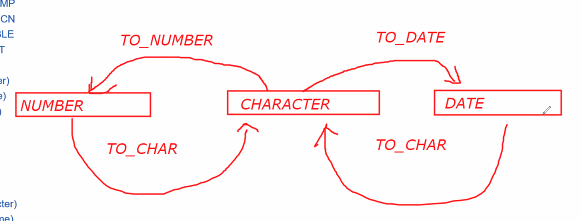

- 통화 : L
- 공백제거 : FM
- 표기법 : EEEE(지수), RN(로마표기자), rn, X(16진수)
- 기호표시 : MI(마지막에 붙이는 음수 표기법), PR(음수인 경우 <> 안에 표기), S(앞에 붙이는 음수 표기법)

In [ ]:
SELECT '000123', TO_NUMBER('000123') FROM DUAL; # 123 리턴

In [ ]:
SELECT TO_CHAR(1000, '9999') FROM DUAL; # 자릿수 4개
SELECT TO_CHAR(1000, '00009999') FROM DUAL;
SELECT TO_CHAR('1000', '00009999') FROM DUAL;
SELECT TO_CHAR(12.3, '009.90') FROM DUAL;
SELECT TO_CHAR(12345, '99,999.9') AS RES FROM DUAL;

In [ ]:
SELECT TO_CHAR(12345, 'L99,999.9') AS RES FROM DUAL; # ￦12,345.0
SELECT TO_CHAR(12345, 'FM999,999.9') AS RES FROM DUAL; # 12,345.
SELECT TO_CHAR(12345, '9.9EEEE') AS RES FROM DUAL; # 1.2E+04
SELECT TO_CHAR(5, 'RN') AS RES FROM DUAL; # V

In [ ]:
SELECT TO_CHAR(-123, '999MI') AS RES FROM DUAL; # 123-
SELECT TO_CHAR(-123, '999PR') AS RES FROM DUAL; # <123>
SELECT TO_CHAR(-123, 'S999') AS RES FROM DUAL; # -123

In [ ]:
# 달러표시
SELECT EMPNO, ENAME, JOB, SAL, TO_CHAR(SAL, '$999,999')
FROM EMP
WHERE DEPTNO = 20
ORDER BY SAL DESC;

# 원화표시
SELECT EMPNO, ENAME, JOB, SAL, TO_CHAR(SAL, 'L999,999')
FROM EMP
WHERE DEPTNO = 20
ORDER BY SAL DESC;

- IW : 1월1일부터 첫번째 일요일까지 1주차, IOS 주표시
- DY : MON
- DAY : Monday
- MON : JAN
- MONTH : January
- RM : 월을 표시할 때 로마식

In [ ]:
SELECT ENAME, HIREDATE, TO_CHAR(HIREDATE, 'FMDD MONTH YYYY') T_HIREDATE,
TO_CHAR(HIREDATE, 'YYYY"년" MM"월" DD"일"') T_KOR
FROM EMP
WHERE DEPTNO = 10
ORDER BY HIREDATE DESC;

In [ ]:
SELECT TO_CHAR(SYSDATE, 'YYYY-MM-DD-HH:MM:SS') FROM DUAL;
SELECT TO_CHAR(SYSDATE, 'YY-MM-DD-HH:MM:SS') FROM DUAL;
SELECT TO_CHAR(SYSDATE, 'RR-MM-DD-HH:MM:SS') FROM DUAL;

SELECT TO_CHAR(SYSDATE, 'WW') TEST FROM DUAL; # 해당년도 1월1일부터 현재가 몇주차인지 리턴
SELECT TO_CHAR(SYSDATE, 'W') TEST FROM DUAL; # 해당월을 기준으로 현재가 몇주차인지 리턴

SELECT TO_CHAR(SYSDATE, 'YY/MM/DD(DAY) HH:MI:SS AM') TEST FROM DUAL;
SELECT TO_CHAR(SYSDATE, 'YY/MM/DD(DAY) (HH):MI:SS (AM)') TEST FROM DUAL; # 21/05/21(금요일) (09):34:26 (오전) 리턴

In [ ]:
# YY : 년도를 현재의 세기로 해석
# RR : 50년을 기준으로 해석
# 현재의 년도가 2000~2050년도 사이라면 
# RR 01~49는 2000년대
# RR 50~99는 1900년대

SELECT TO_CHAR(TO_DATE('98', 'YY'), 'YYYY') TEST1, # 2098
TO_CHAR(TO_DATE('98', 'RR'), 'YYYY') TEST2 # 1998
FROM DUAL;

**추가변환 함수**
- TO_DSINTERVAL : INTERVAL DAY TO SECOND 타입으로 변환
- TO_TIMESTAMP
- TO_TIMESTAMP_TZ : TIMESTAMP WITH TIME ZONE
- TO_YMINTERVAL : INTERVAL YEAR TO MONTH

In [ ]:
SELECT SYSDATE, SYSDATE + TO_YMINTERVAL('01-03') NEW # 15 MONTHS LATER
FROM DUAL;

SELECT SYSDATE, SYSDATE + TO_DSINTERVAL('003 17:00:00') NEW # 3DAYS 17HOURS LATER
FROM DUAL;

**기타 함수**
- NVL(COLUMN, EXP1) : NULL을 EXP1로 변환
- NVL2(COLUMN, EXP1, EXP2) : NULL이면 EXP2를 리턴하고, NULL이 아니면 EXP1를 리턴
- NULLIF(EXP1, EXP2) : EXP1과 EXP2값을 비교해 같으면 NULL, 다르면 EXP1을 리턴
- COALESCE(EXP1, ..., EXPn) : EXP1, ..., EXPn 중 NULL이 아닌 첫번째 값을 리턴
- DECODE : IF ~ THEN ~ ELSE 문의 역할 수행 (조건부 조회를 쉽게)
- CASE WHEN THEN ELSE END

In [ ]:
SELECT ENAME, MGR, NVL2(MGR, MGR||'담당', '상위관리자') AS RESULT
FROM EMP;

SELECT ENAME, JOB, NULLIF(JOB, 'CLERK') AS RESULT
FROM EMP;

SELECT ENAME, COMM, SAL, COALESCE(COMM, 50) RESULT
FROM EMP;

SELECT ENAME, SAL,
DECODE(SIGN(SAL - 1000), -1, 'A',
DECODE(SIGN(SAL - 2500), -1, 'B', 'C')) GRADE
FROM EMP;

SELECT ENAME, SAL,
CASE WHEN SAL < 1000 THEN 'A'
WHEN SAL >= 1000 AND SAL < 2500 THEN 'B'
ELSE 'C' END AS GRADE
FROM EMP;

- COUNT(*) : NULL을 포함한 행의 수
- COUNT(표현식) : 표현식의 값이 NULL을 제외한 행의 수
- AVG([DISTINCT|ALL]표현식) : NULL을 제외하고 연산
- STDDEV([DISTINCT|ALL]표현식) : NULL을 제외하고 연산
- VARIAN([DISTINCT|ALL]표현식) : NULL을 제외하고 연산
- MIN, MAX([DISTINCT|ALL]표현식) : NULL을 제외하고 연산, 문자/날짜도 사용가능

In [ ]:
SELECT MIN(ENAME), MAX(ENAME), MIN(HIREDATE), MAX(HIREDATE)
FROM EMP;

SELECT AVG(COMM), AVG(NVL(COMM, 0))
FROM EMP;

SELECT AVG(SAL), MAX(SAL), MIN(SAL), SUM(SAL)
FROM EMP
WHERE JOB = 'SALESMAN';

SELECT AVG(SAL), MAX(SAL), MIN(SAL), SUM(SAL)
FROM EMP
WHERE JOB LIKE 'SALESMAN';

SELECT AVG(SAL), MAX(SAL), MIN(SAL), SUM(SAL)
FROM EMP
WHERE JOB LIKE 'SAL%';

SELECT COUNT(*), COUNT(ENAME), COUNT(COMM), COUNT(NVL(COMM,0)) # 12, 12, 4, 12
FROM EMP;

SELECT COUNT(ALL JOB), COUNT(DISTINCT JOB) # 중복포함, 중복미포함
FROM EMP;

**다중행(그룹/집합/집계) 함수**
- GROUP BY : **별칭** 사용불가
- HAVING : 그룹의 조건문
- ROLLUP : 총집계
- CUBE : GROUP BY 확장기능, ROLLUP의 결과 행 및 교차 도표화 행을 포함하는 결과 집합을 산출, GROUP BY 절에 N개의 열이 있을 경우 그룹집계는 2의 N승 개
- GROUPING : GROUPING 작업에 사용됐는지(0) 안됐는지(1)를 리턴
- GROUPING SETS

In [ ]:
SELECT DEPTNO, COUNT(*), AVG(SAL), SUM(SAL), MAX(SAL), MIN(SAL)
FROM EMP
GROUP BY DEPTNO
ORDER BY 4 DESC;

SELECT DEPTNO, JOB, COUNT(*), AVG(SAL), SUM(SAL), MAX(SAL), MIN(SAL)
FROM EMP
GROUP BY JOB, DEPTNO;

In [ ]:
SELECT DEPTNO, COUNT(*), SUM(SAL)
FROM EMP
WHERE DEPTNO = 20
GROUP BY DEPTNO
HAVING COUNT(*) > 1
ORDER BY 3 DESC;

SELECT DEPTNO, AVG(SAL), SUM(SAL)
FROM EMP
GROUP BY DEPTNO
HAVING MAX(SAL) >= 2900;

SELECT MAX(AVG(SAL)) # 최대 2번까지 중첩 가능
FROM EMP
GROUP BY DEPTNO;

In [ ]:
SELECT DEPTNO, COUNT(*), SUM(SAL)
FROM EMP
GROUP BY ROLLUP(DEPTNO); # 정렬도 알아서 해줌

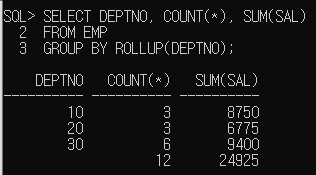

In [ ]:
SELECT DEPTNO, JOB, SUM(SAL)
FROM EMP
GROUP BY ROLLUP(DEPTNO, JOB);

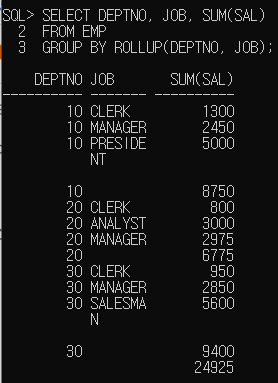

In [ ]:
SELECT DEPTNO, JOB, MGR, SUM(SAL)
FROM EMP
GROUP BY ROLLUP(DEPTNO, JOB, MGR);

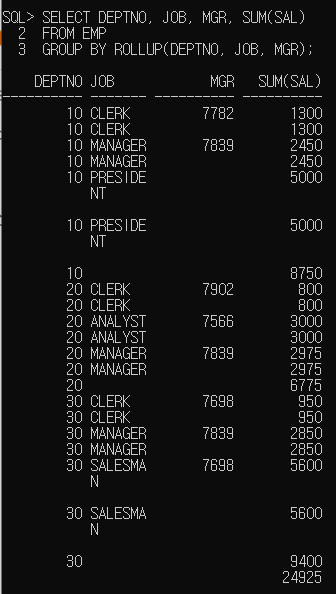

In [ ]:
SELECT DEPTNO, COUNT(*), SUM(SAL)
FROM EMP
GROUP BY CUBE(DEPTNO);

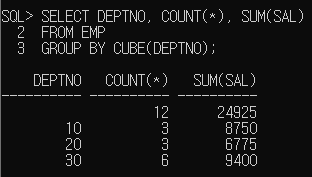

In [ ]:
SELECT DEPTNO, JOB, SUM(SAL)
FROM EMP
GROUP BY CUBE(DEPTNO, JOB);

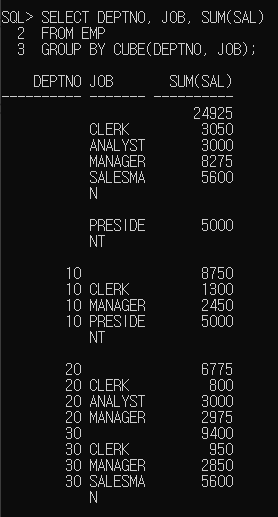

In [ ]:
SELECT DEPTNO, JOB, MGR, SUM(SAL)
FROM EMP
GROUP BY CUBE(DEPTNO, JOB, MGR)
ORDER BY 1 DESC;

In [ ]:
SELECT DEPTNO, JOB, SUM(SAL), GROUPING(DEPTNO), GROUPING(JOB)
FROM EMP
GROUP BY ROLLUP(DEPTNO, JOB);

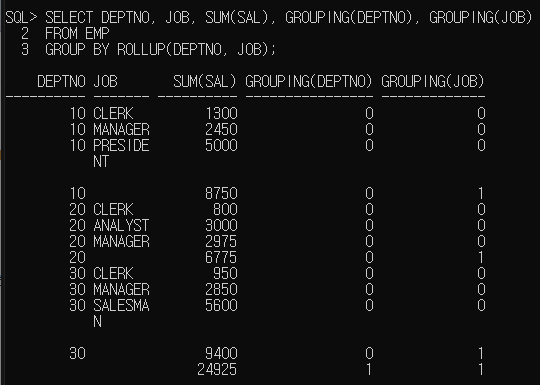

In [ ]:
SELECT DEPTNO, JOB, SUM(SAL), GROUPING(DEPTNO), GROUPING(JOB)
FROM EMP
GROUP BY CUBE(DEPTNO, JOB);

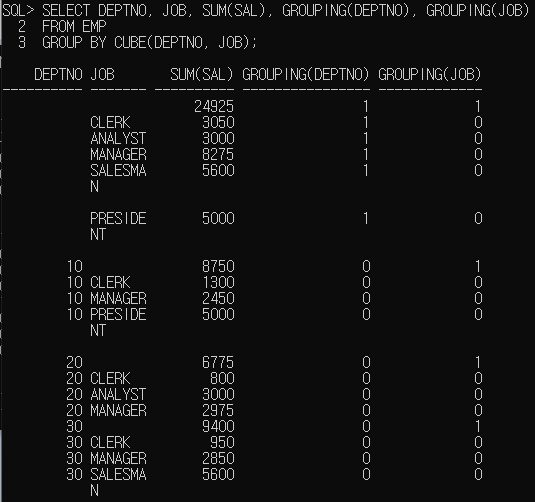

In [ ]:
# 1번과 2번 결과 같음

# 1번
SELECT DEPTNO, JOB, MGR, AVG(SAL)
FROM EMP
GROUP BY GROUPING SETS((DEPTNO, JOB, MGR), (DEPTNO, MGR), (JOB, MGR));

# 2번
SELECT DEPTNO, JOB, MGR, AVG(SAL)
FROM EMP
GROUP BY DEPTNO, JOB, MGR
UNION ALL
SELECT DEPTNO, NULL, MGR, AVG(SAL)
FROM EMP
GROUP BY DEPTNO, MGR
UNION ALL
SELECT NULL, JOB, MGR, AVG(SAL)
FROM EMP
GROUP BY JOB, MGR;

In [ ]:
SELECT DEPTNO, JOB, MGR, SUM(SAL)
FROM EMP
GROUP BY ROLLUP(DEPTNO, (JOB, MGR));

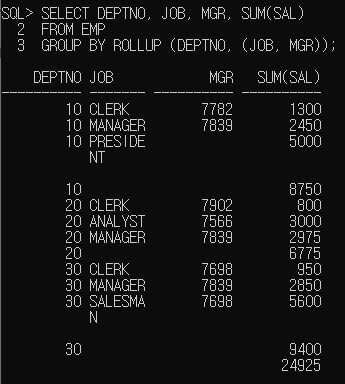

In [ ]:
SELECT DEPTNO, JOB, MGR, SUM(SAL)
FROM EMP
GROUP BY CUBE(DEPTNO, (JOB, MGR));

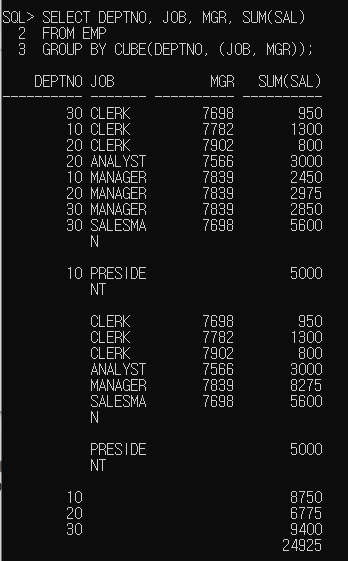

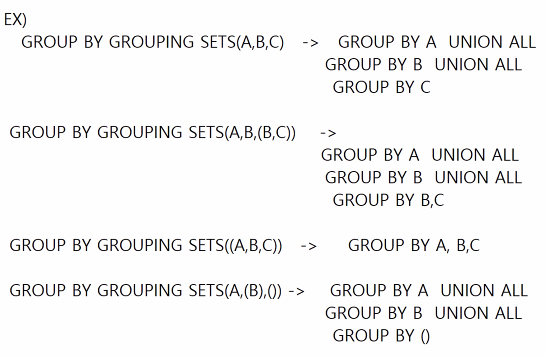

### 분석함수

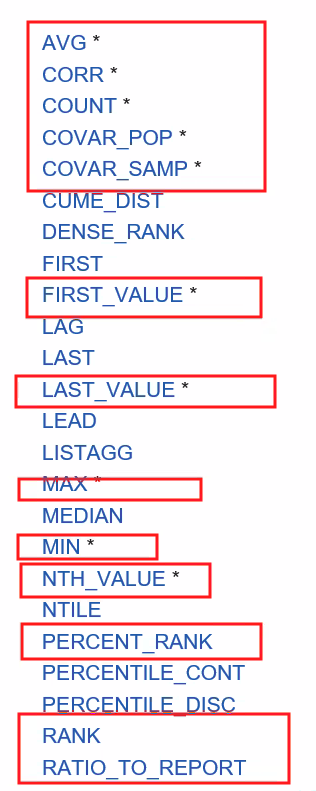

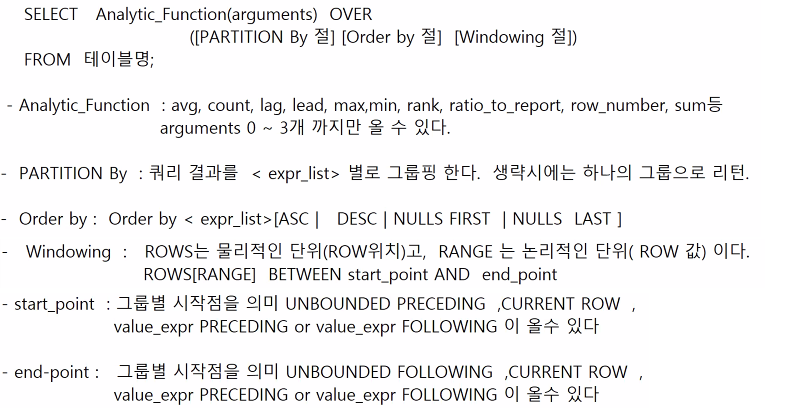

**분석함수**
- 행 간의 연산을 원활하게 연동
- JOIN이나 프로그램의 OVER HEAD를 줄임 : QUERY SPEED의 향상된 SELF-JOIN과 절차적 로직으로 표현하는 것을 NATIVE SQL에서 바로 적용
- 유지보수가 간편하고 생산성 향상
- 기존 SQL syntax를 그대로 쓰기 때문에 ANSI SQL로 채택됨
- 서브쿼리에서 사용 가능
- 중첩 불가
- ORDER BY에서 별칭이나 숫자 사용불가


In [ ]:
SELECT ENAME, DEPTNO, SAL, RANK() OVER(ORDER BY SAL DESC) "RANK"
FROM EMP;

SELECT ENAME, DEPTNO, SAL, RANK() OVER(ORDER BY SAL DESC) RANK
FROM EMP;

SELECT ENAME, DEPTNO, SAL, RANK() OVER(ORDER BY SAL DESC) AS RANK
FROM EMP;

In [ ]:
SELECT ENAME, DEPTNO, SAL, RANK() OVER(PARTITION BY DEPTNO ORDER BY SAL DESC) AS RANK
FROM EMP;

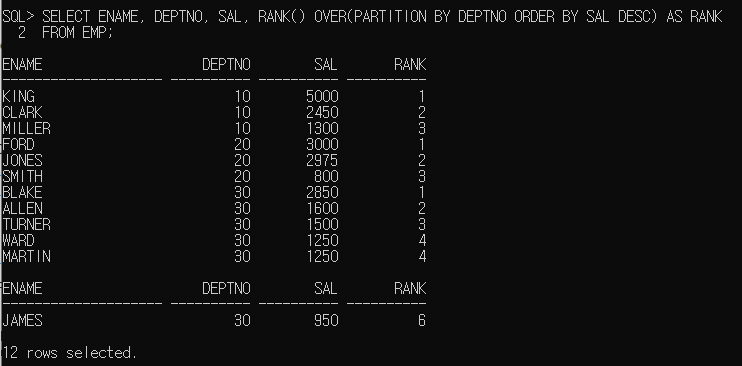

In [ ]:
CREATE TABLE TEST_EMP
AS
SELECT * FROM EMP;

CREATE TABLE TEST03(MYNAME, MYNO)
AS
SELECT ENAME, EMPNO 
FROM EMP;

CREATE TABLE TEST04
AS
SELECT ENAME, EMPNO, JOB
FROM EMP
WHERE ENAME = 'FORD';

In [ ]:
INSERT INTO TEST_EMP(EMPNO, ENAME, SAL, DEPTNO) VALUES(111, 111, 3000, 30);
INSERT INTO TEST_EMP(EMPNO, ENAME, SAL, DEPTNO) VALUES(222, 222, 3000, 30);
INSERT INTO TEST_EMP(EMPNO, ENAME, SAL, DEPTNO) VALUES(333, 333, 3000, 20);
INSERT INTO TEST_EMP(EMPNO, ENAME, SAL, DEPTNO) VALUES(444, 444, 3000, 20);
COMMIT;

# 1 1 1 4
SELECT ENAME, DEPTNO, SAL, RANK() OVER(PARTITION BY DEPTNO ORDER BY SAL DESC) AS RANK
FROM TEST_EMP;

# 1 1 1 2
SELECT ENAME, DEPTNO, SAL, DENSE_RANK() OVER(PARTITION BY DEPTNO ORDER BY SAL DESC) AS DENSE_RANK
FROM TEST_EMP;

In [ ]:
# 누적분포(Cumulative Distribution)
# - 작거나 같은 값을 가진 비율
# - 0보다 크고 1보다 작거나 같다
SELECT ENAME, SAL, CUME_DIST() OVER(ORDER BY SAL) CUME_DIST
FROM TEST_EMP
WHERE DEPTNO = 20;

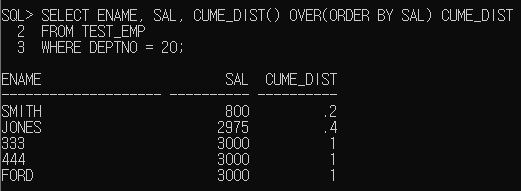

In [ ]:
SELECT ENAME, SAL, NTILE(4) OVER(ORDER BY SAL)
FROM EMP;

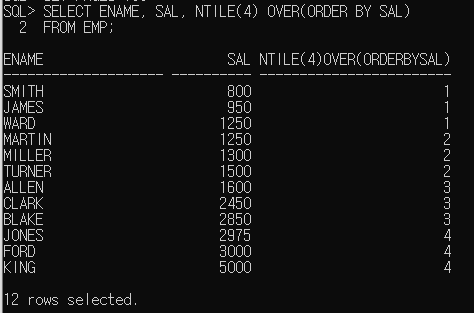

In [ ]:
SELECT EMPNO, ENAME, SAL, HIREDATE,
ROW_NUMBER() OVER(ORDER BY SAL DESC, HIREDATE ASC) AS "순번"
FROM TEST_EMP;

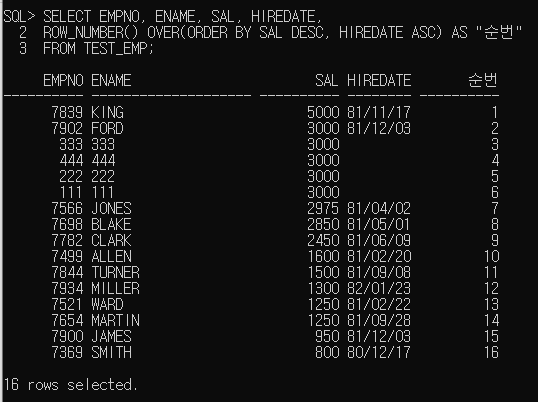

In [ ]:
SELECT ENAME, DEPTNO, SAL, 
SUM(SAL) OVER() "TOTAL_SUM", 
SUM(SAL) OVER(PARTITION BY DEPTNO) "DEPT_SUM"
FROM TEST_EMP;

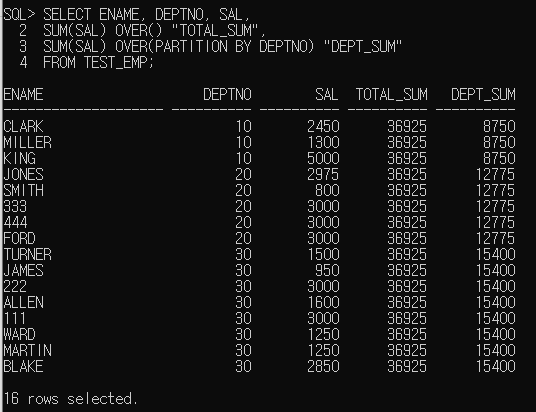

In [ ]:
SELECT ENAME, DEPTNO, SAL,
SUM(SAL) OVER(ORDER BY SAL 
              ROWS BETWEEN 1 PRECEDING
                   AND 1 FOLLOWING) "SUM1",  -- 이전ROW ~ 이후ROW
SUM(SAL) OVER(ORDER BY SAL
              ROWS UNBOUNDED PRECEDING) "SUM2"  -- 첫번째ROW ~ 현재ROW
FROM TEST_EMP;     

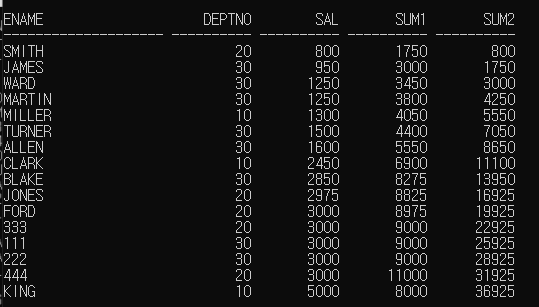

In [ ]:
SELECT ENAME, HIREDATE, SAL,
SUM(SAL) OVER(ORDER BY HIREDATE
              RANGE BETWEEN INTERVAL '3' MONTH PRECEDING
                    AND INTERVAL '1' MONTH PRECEDING) "SUM3"  -- 3개월이전 ~ 1개월이전
FROM TEST_EMP;                       

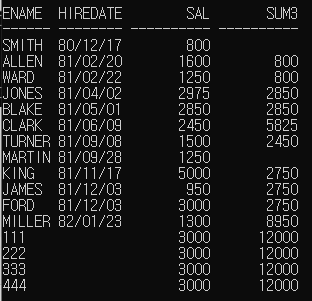

In [ ]:
SELECT ENAME, SAL,
RATIO_TO_REPORT(SAL) OVER() 비율,
TRUNC(RATIO_TO_REPORT(SAL) OVER() * 50000) AS "받을급여"
FROM TEST_EMP;

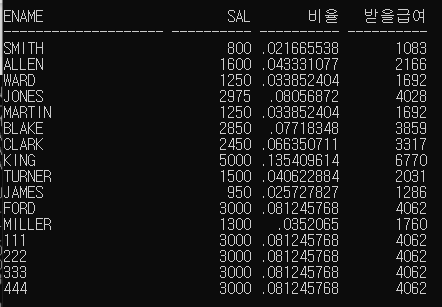

In [ ]:
SELECT ENAME, DEPTNO, SAL, 
LAG(SAL, 1) OVER(ORDER BY SAL) AS SAL0,
LAG(SAL, 1, 0) OVER(ORDER BY SAL) AS SAL1,
LAG(SAL, 1, SAL) OVER(ORDER BY SAL) AS SAL2
FROM TEST_EMP;

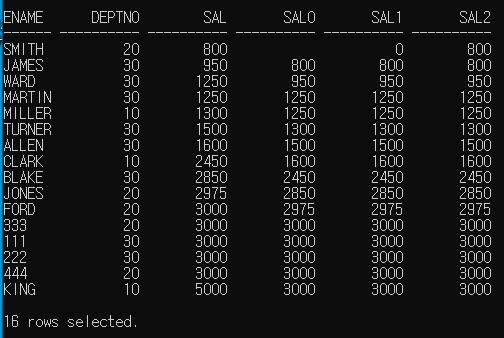

In [ ]:
SELECT ENAME, DEPTNO, SAL, 
LAG(SAL, 1, SAL) OVER(PARTITION BY DEPTNO ORDER BY SAL) AS SAL3
FROM TEST_EMP;

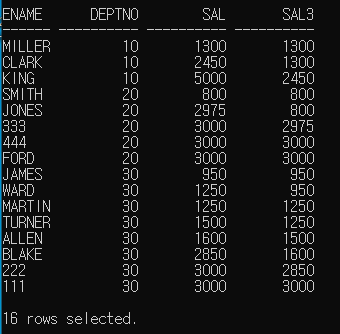

In [ ]:
SELECT ENAME, DEPTNO, SAL, 
LEAD(SAL, 1) OVER(ORDER BY SAL) AS SAL0,
LEAD(SAL, 1, 0) OVER(ORDER BY SAL) AS SAL1,
LEAD(SAL, 1, SAL) OVER(ORDER BY SAL) AS SAL2,
LEAD(SAL, 1, SAL) OVER(PARTITION BY DEPTNO ORDER BY SAL) AS SAL3
FROM TEST_EMP;

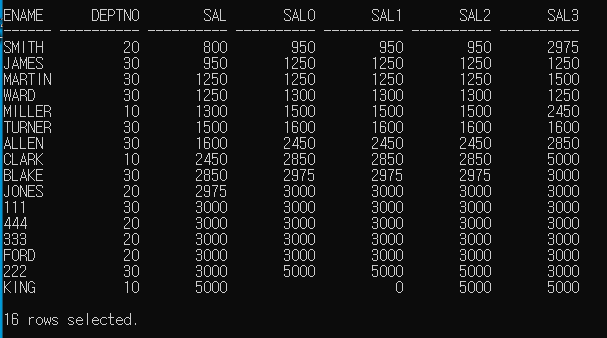

## JOIN
- JOIN = INNER JOIN = EQUIJOIN : FALSE/NULL 값 안 나옴
- OUTER JOIN : 주테이블(DEPT)은 전체출력하고 종테이블(EMP)은 TRUE만 출력
- SELF JOIN : 같은 테이블
- NON-EQUIJOIN : 2개의 테이블 간에 컬럼값들이 일치하지 않을 경우
  
왼쪽이 오른쪽을 참조
참조형 테이블(DEPT) DEPTNO PK NULL값 절대로 들어가면 안됨

In [ ]:
# DEPTNO 컬럼이 2개 생성
# 조건없이 JOIN 결과 : 48행

SELECT *
FROM EMP, DEPT;

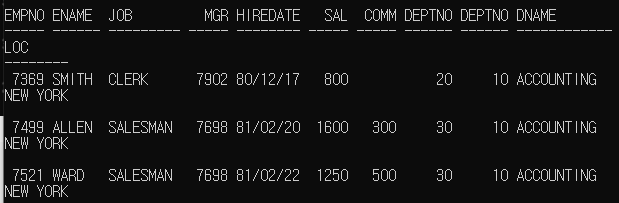

In [ ]:
# ANSI (INNER) JOIN
SELECT EMPNO, ENAME, DEPTNO, DNAME
FROM EMP JOIN DEPT USING(DEPTNO);

# ORACLE (INNER) JOIN
SELECT E.EMPNO, E.ENAME, E.DEPTNO, D.DNAME
FROM EMP E, DEPT D
WHERE E.DEPTNO = D.DEPTNO;

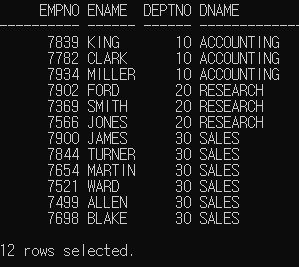

In [ ]:
# ANSI
# INNER JOIN은 NULL값 안 나옴
INSERT INTO TEST_EMP(ENAME, DEPTNO) VALUES(777, NULL);
SELECT EMPNO, ENAME, DEPTNO, DNAME
FROM TEST_EMP JOIN DEPT USING(DEPTNO);

# ORACLE
SELECT T.EMPNO, T.ENAME, T.DEPTNO, D.DNAME
FROM TEST_EMP T, DEPT D
WHERE T.DEPTNO = D.DEPTNO;

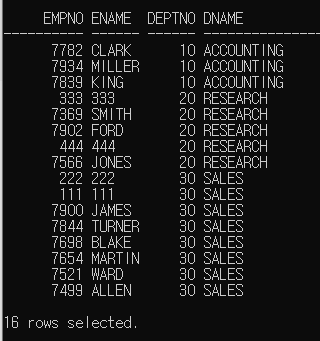

In [ ]:
# ANSI
SELECT EMPNO, ENAME, SAL, DNAME, LOC
FROM EMP JOIN DEPT USING(DEPTNO)
WHERE JOB = 'SALESMAN';

# ORACLE
SELECT E.EMPNO, E.ENAME, E.SAL, D.DNAME, D.LOC
FROM EMP E, DEPT D
WHERE E.DEPTNO = D.DEPTNO AND E.JOB = 'SALESMAN';

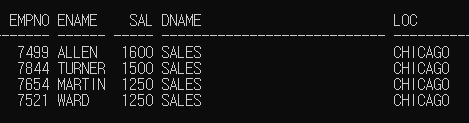

In [ ]:
# ANSI OUTER JOIN
# 종테이블을 먼저 써주고 RIGHT OUTER JOIN
SELECT EMPNO, ENAME, JOB, DEPTNO, ENAME
FROM EMP RIGHT OUTER JOIN DEPT USING(DEPTNO);

# ORACLE OUTER JOIN
# 종테이블에 +키워드를 줌
SELECT E.EMPNO, E.ENAME, E.JOB, D.DEPTNO, D.DNAME
FROM DEPT D, EMP E
WHERE D.DEPTNO = E.DEPTNO(+);

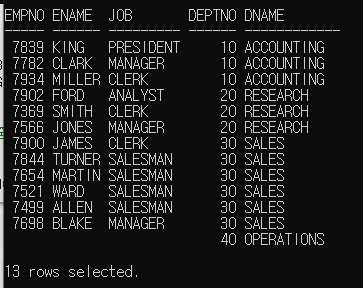

In [ ]:
CREATE TABLE X (
    S1 VARCHAR2(2),
    X2 VARCHAR2(2)
);
CREATE TABLE Y (
    S1 VARCHAR2(2),
    Y2 VARCHAR2(2)
);

INSERT INTO X VALUES('YA', NULL);
INSERT INTO X VALUES('YB', 1);
INSERT INTO X VALUES('C', NULL);

INSERT INTO Y VALUES('YA', NULL);
INSERT INTO Y VALUES('YB', 1);

SELECT * FROM X RIGHT OUTER JOIN Y USING(S1); -- X가 종테이블
SELECT * FROM X LEFT OUTER JOIN Y USING(S1);

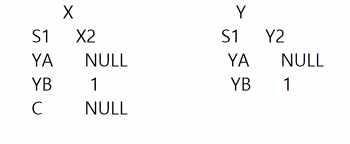

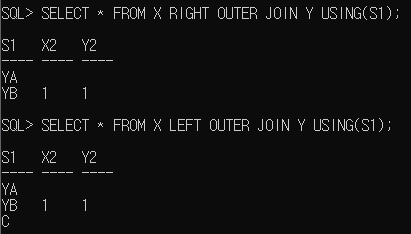